In [1]:
import os
import glob
import matplotlib.pyplot as plt
import mne
import numpy as np
import pandas as pd
import csv
import gc
import seaborn as snx
sfreq=250
from mne.decoding import Vectorizer
import matplotlib.colors as mcolors

from mne.viz import set_browser_backend

set_browser_backend("qt")

Using qt as 2D backend.


## Raw data preprocessing

In [2]:
subj = 'S751'
run = '01'
stim_code = pd.read_csv(f'BCI_HSE{subj[1:]}/stim_code/stim_code_{subj}R{run}.csv')

In [30]:
def tsv_to_fif(subj, run, sfreq = 250):
    n_channels = 8 # 8 eeg channels + triggers
    subj_name = f'{subj}'
    stim_code = pd.read_csv(f'BCI_HSE{subj[1:]}/stim_code/stim_code_{subj_name}R{run}.csv')

    data = np.zeros((stim_code.shape[0], n_channels))
    with open(f"BCI_HSE{subj[1:]}/raw/BCI_HSE{subj_name}R{run}.ascii") as tsv:
        i = 0
        for line in csv.reader(tsv, dialect="excel-tab"):
            if i == 0:
                columns = line
                i += 1
            elif i <= stim_code.shape[0]:
                data[i-1] = line
                i += 1
    smart = pd.DataFrame(data, columns = columns)
    smart['STIM101'] = stim_code

    # ch_names = columns
    ch_names = list(smart.columns)
    ch_types = ['eeg']*8 + ['stim']
    info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sfreq)
    raw = mne.io.RawArray(smart.values.T, info)

    path_out = f'BCI_HSE{subj[1:]}/preprocessed/'
    os.makedirs(path_out, exist_ok = True)

    raw_filt = raw.copy().filter(
        h_freq=None, l_freq=.1, l_trans_bandwidth='auto', picks = ['eeg'],
        h_trans_bandwidth='auto', filter_length='auto', phase='zero',
        fir_window='hamming', fir_design='firwin', n_jobs=4).notch_filter(
            freqs = np.arange(50,  raw.info['sfreq'] / 2, 50)).notch_filter(
                freqs = np.arange(50,  raw.info['sfreq'] / 2, 50), notch_widths = 2)

    raw_filt.save(f'{path_out}/{subj_name}R{run}_filt_raw.fif', overwrite = True)
    return raw, raw_filt

In [31]:
subj = 'S751'
for run in ['01', '02', '03', '04']:
    raw, raw_filt = tsv_to_fif(subj, run = run)

Creating RawArray with float64 data, n_channels=9, n_times=283255
    Range : 0 ... 283254 =      0.000 ...  1133.016 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8251 samples (33.004 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

Writing /Users/maria/Documents/BCI_new/BCI_HSE751/preprocessed/S751R01_filt_raw.fif
Closing /Users/maria/Documents/BCI_new/BCI_HSE751/preprocessed/S751R01_filt_raw.fi

[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


Creating RawArray with float64 data, n_channels=9, n_times=281759
    Range : 0 ... 281758 =      0.000 ...  1127.032 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8251 samples (33.004 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

F

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


Creating RawArray with float64 data, n_channels=9, n_times=281871
    Range : 0 ... 281870 =      0.000 ...  1127.480 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8251 samples (33.004 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

F

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


Creating RawArray with float64 data, n_channels=9, n_times=280495
    Range : 0 ... 280494 =      0.000 ...  1121.976 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8251 samples (33.004 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

F

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/var/folders/nq/51xqhsgx3cd0cws5y76dj66r0000gn/T/ipykernel_85020/4108630121.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
/Users/maria/Library/Python/3.9/lib/python/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


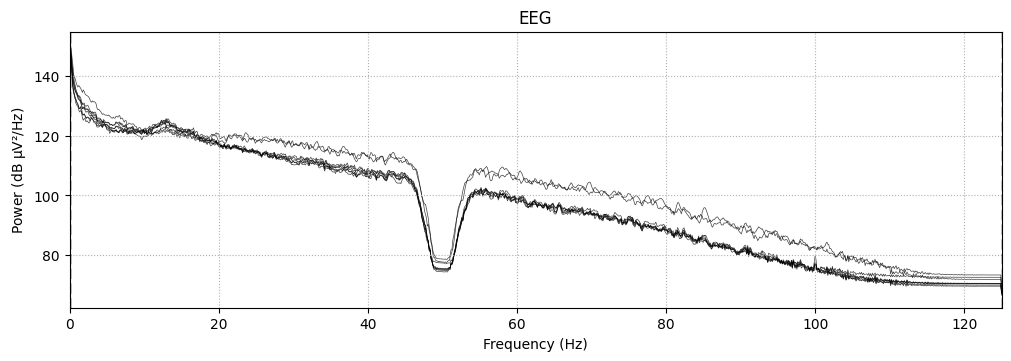

In [32]:
raw.compute_psd().plot()

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/var/folders/nq/51xqhsgx3cd0cws5y76dj66r0000gn/T/ipykernel_85020/1185855208.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filt.compute_psd().plot()
/Users/maria/Library/Python/3.9/lib/python/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


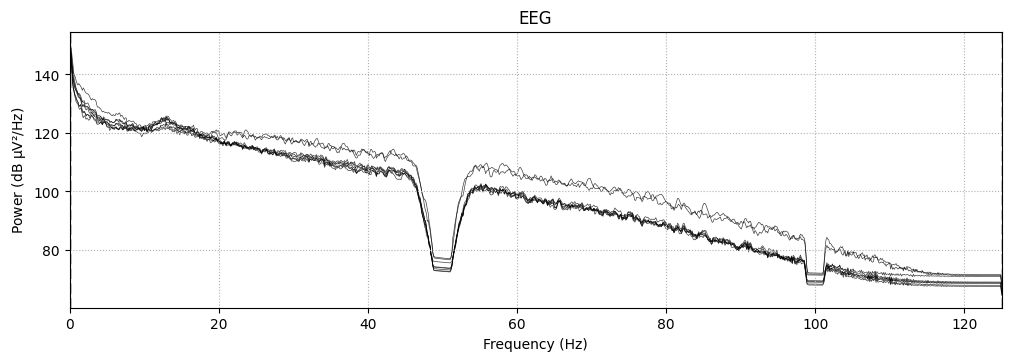

In [33]:
raw_filt.compute_psd().plot()

In [34]:
subj = 'S751'
subj_name = f'{subj}'
for run in ['01', '02', '03', '04']:
    file = f'BCI_HSE{subj[1:]}/preprocessed/{subj_name}R{run}_filt_raw.fif'
    raw = mne.io.read_raw_fif(file, preload = True)

    st_val = raw._data[-1]
    beg = pd.read_csv(f'BCI_HSE{subj[1:]}/stim_code/stim_begin_{subj_name}R{run}.csv').values[:, 0]
    beg[np.where(np.diff(beg) == 1)[0] + 1] = 100
    beg_st = np.concatenate([st_val[:, None], beg[:, None]], axis = 1)
    eve = []
    ts = []
    for i in range(len(beg_st)):
        if beg_st[i, 1] == 100:
            eve.append(beg_st[i, 0])
            ts.append(i)

    eve = np.array(eve)[:, None]
    zero = np.zeros(len(eve))[:, None]
    ts = np.array(ts)[:, None]

    events = np.concatenate([ts,zero,eve], axis = 1).astype(int)

    trigg = np.arange(2, np.unique(events[:, 2])[-1], 8)
    for i in range(len(events)):
        if events[i, 2] == 1:
            events[i, 2] = -1
        for j in trigg:
            if events[i, 2] == j:
                events[i, 2] = 1001
            elif events[i, 2] == j+1:
                events[i, 2] = 1002
            elif events[i, 2] == j+2:
                events[i, 2] = 1003
            elif events[i, 2] == j+3:
                events[i, 2] = 1004
            elif events[i, 2] == j+4:
                events[i, 2] = 1005
        if events[i, 2] < 1001:
            events[i, 2] = -1

    event_id = {'stim/1' : 1001, 'distr/2' : 1002, 'distr/3': 1003, 'distr/4': 1004, 'distr/5': 1005}

    epochs = mne.Epochs(
        raw,
        tmin=-.2,
        tmax = 1,
        events=events,
        event_id=event_id,
        baseline = None,
        reject_by_annotation=False,
        preload = True
        )

    os.makedirs(f'BCI_HSE{subj[1:]}/epochs/', exist_ok=True)
    epochs.save(f'BCI_HSE{subj[1:]}/epochs/{subj_name}_run{run}-epo.fif', overwrite = True)

Opening raw data file BCI_HSE751/preprocessed/S751R01_filt_raw.fif...
Isotrak not found
    Range : 0 ... 283254 =      0.000 ...  1133.016 secs
Ready.
Reading 0 ... 283254  =      0.000 ...  1133.016 secs...
Not setting metadata
500 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 500 events and 301 original time points ...
0 bad epochs dropped
Opening raw data file BCI_HSE751/preprocessed/S751R02_filt_raw.fif...
Isotrak not found
    Range : 0 ... 281758 =      0.000 ...  1127.032 secs
Ready.
Reading 0 ... 281758  =      0.000 ...  1127.032 secs...
Not setting metadata
500 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 500 events and 301 original time points ...
0 bad epochs dropped
Opening raw data file BCI_HSE751/preprocessed/S751R03_filt_raw.fif...
Isotrak not found
    Range : 0 ... 281870 =      0.000 ...  1127.480 secs
Ready.
Reading 0 ... 2818

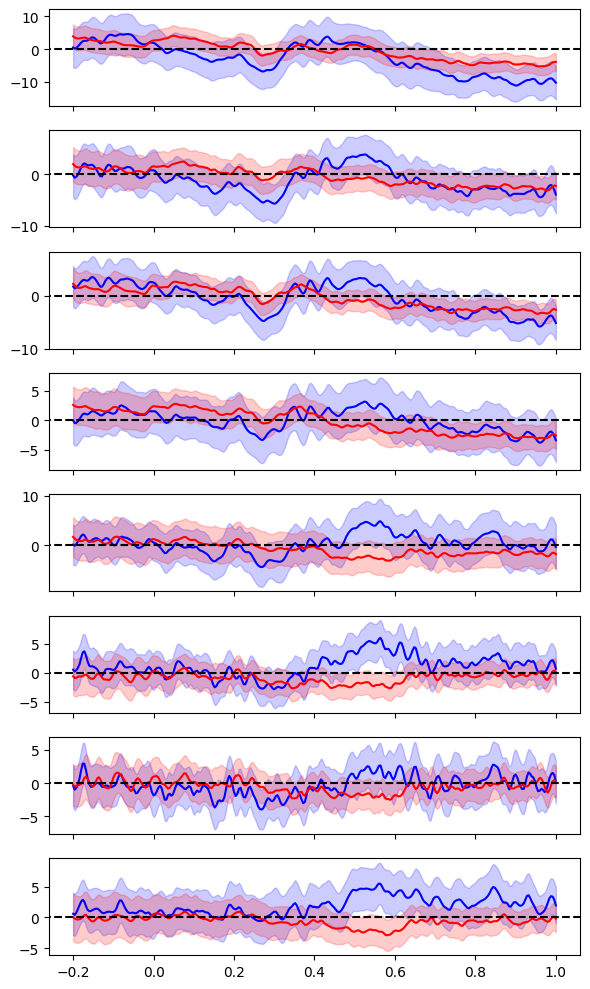

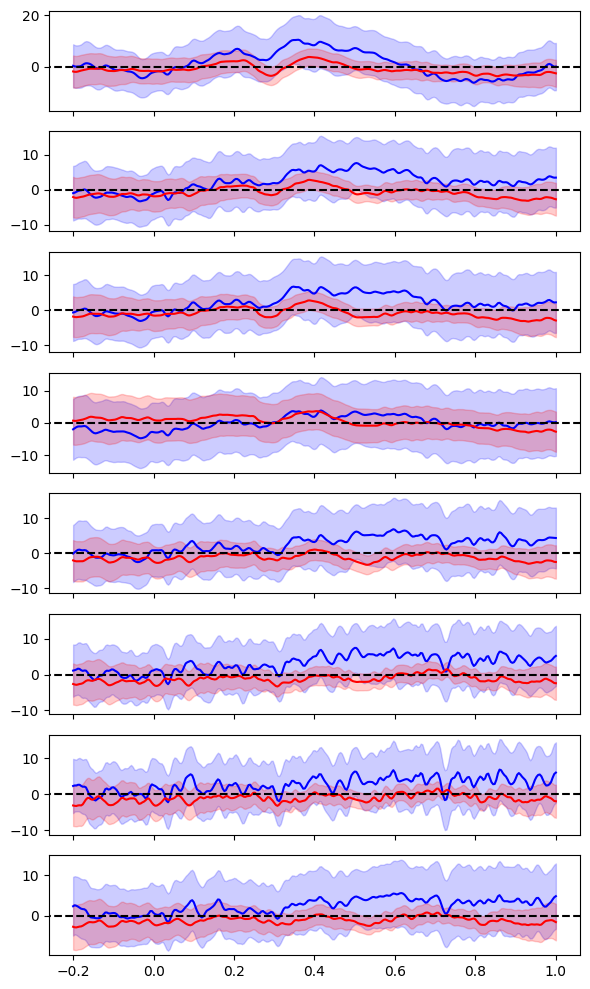

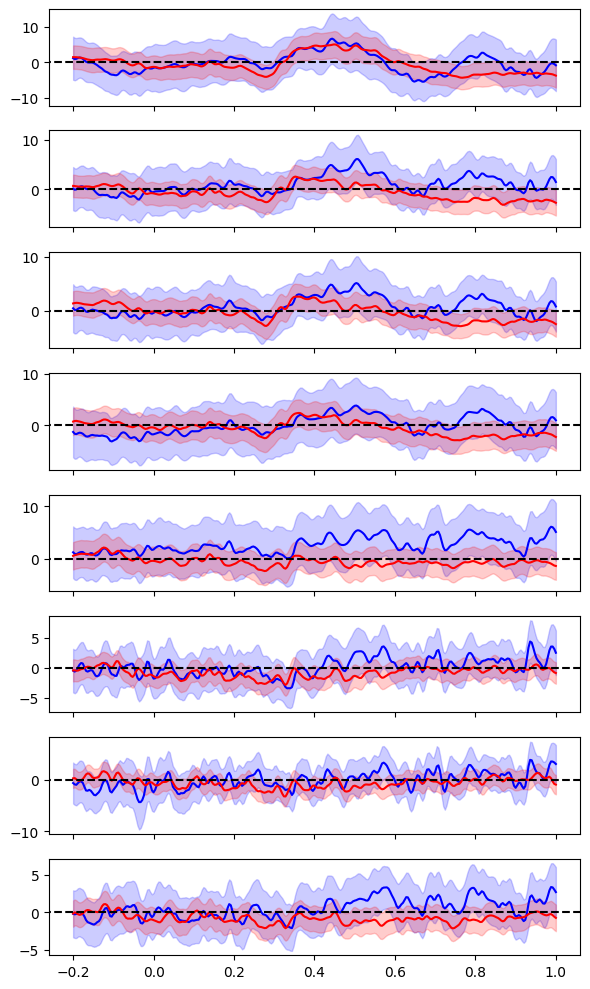

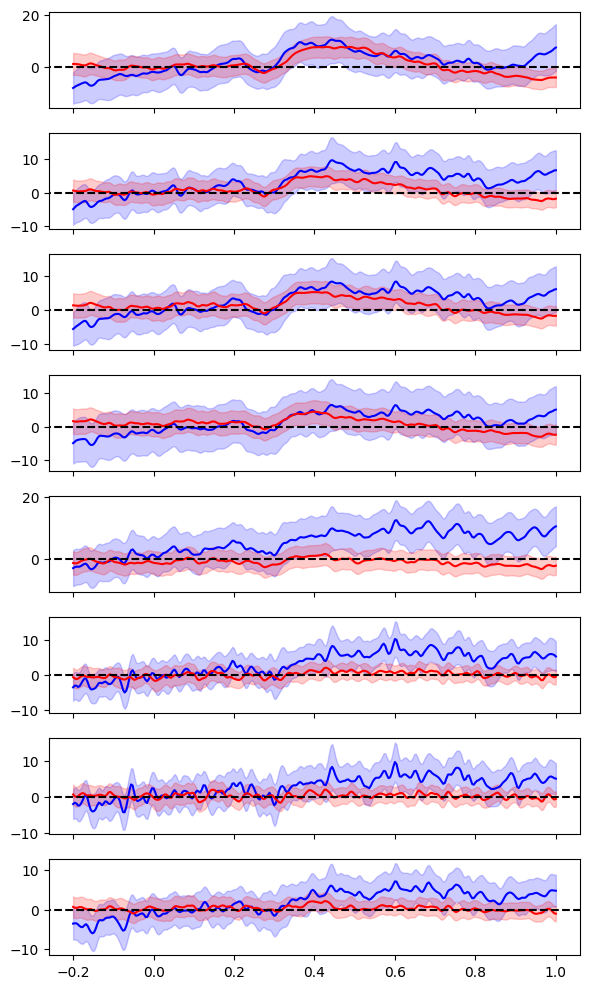

In [46]:
save = True
for subj in ['S572']:
    subj_name = f'{subj}'
    os.makedirs(f'BCI_HSE{subj[1:]}/output/', exist_ok= True)
    for run in ['01', '02', '03', '04']:
        fig, axs = plt.subplots(8, figsize=(6, 10), sharex = True, sharey = False)
        epochs = mne.read_epochs(f'BCI_HSE{subj[1:]}/epochs/{subj_name}_run{run}-epo.fif', verbose=False)
        for ch, ch_n in enumerate(epochs.ch_names[:-1]):
            comp1 = epochs['stim']._data[:, ch]
            comp2 = epochs['distr']._data[:, ch]
            axs[ch].plot(epochs.times, comp1.mean(axis = 0).T, label = 'target', color = 'blue')
            axs[ch].plot(epochs.times, comp2.mean(axis = 0).T, label = 'non-target', color = 'red')
            ci_1 = 1.96 * comp1.std(axis = 0) / len(comp1)**.5
            ci_2 = 1.96 * comp2.std(axis = 0) / len(comp2)**.5
            axs[ch].fill_between(epochs.times, (comp1.mean(axis = 0).T-ci_1), (comp1.mean(axis = 0).T+ci_1), color='blue', alpha=.2)
            axs[ch].fill_between(epochs.times, (comp2.mean(axis = 0).T-ci_2), (comp2.mean(axis = 0).T+ci_2), color='red', alpha=.2)
            axs[ch].axhline(y=0, xmin=epochs.times[0], xmax=epochs.times[-1], linestyle='--', color='black')
            # axs[ch].set_ylim((-20, 20))
        fig.tight_layout()
        if save:
            fig.savefig(f'BCI_HSE{subj[1:]}/output/{subj_name}_{run}.png', dpi = 300, bbox_inches = 'tight')
        plt.show()

In [99]:
df = pd.DataFrame()
for subj in ['S168', 'S213', 'S317', 'S572', 'S751', 'S777']:
    for run in ['01', '02', '03', '04']:
        epochs = mne.read_epochs(f'BCI_HSE{subj[1:]}/epochs/{subj}_run{run}-epo.fif', verbose=False)
        data = epochs._data[:, :-1].reshape((-1, 301))
        data = pd.DataFrame(data)
        data.columns = [f'{t.item()} ms' for t in epochs.times]
        data['ID'] = subj
        data['channel'] = 'Fz, C3, Cz, C4, Pz, O7, Oz, O8'.split(', ') * len(epochs)
        data['session'] = int(run)
        data['trial'] = np.repeat(np.arange(1, 26), 8*5*4)
        data['n_repetition'] = np.repeat((np.repeat(np.arange(1, 5), 40)), 25)
        data['target'] = np.repeat(epochs.events[:, -1], 8) - 1000
        df = pd.concat([df, data])


In [102]:
df.to_csv('BCI_data.csv', index=False)

In [100]:
data.head()

,-0.2 ms,-0.196 ms,-0.192 ms,-0.188 ms,-0.184 ms,-0.18 ms,-0.176 ms,-0.172 ms,-0.168 ms,-0.164 ms,...,0.988 ms,0.992 ms,0.996 ms,1.0 ms,ID,channel,session,trial,n_repetition,target
0,8.082668,6.415280,3.702888,0.471324,-2.027570,-2.220680,0.619740,3.713271,4.079155,1.113185,...,-2.794195,-6.240178,-9.352149,-11.312600,S777,Fz,4,1,1,3
1,-2.836916,-5.687464,-9.777699,-14.439560,-18.031193,-19.207205,-17.532358,-15.167068,-14.067411,-14.854248,...,-8.265314,-11.331633,-14.856510,-17.945631,S777,C3,4,1,1,3
2,3.540334,0.901400,-2.965049,-7.735346,-12.318088,-15.314270,-15.199730,-13.257379,-11.664827,-11.776661,...,-10.214837,-12.896099,-15.543508,-17.523561,S777,Cz,4,1,1,3
3,3.166001,1.903111,-1.151966,-6.048684,-11.335684,-15.279799,-15.640076,-13.000283,-10.312290,-10.290483,...,-13.170668,-14.902697,-15.707730,-16.222019,S777,C4,4,1,1,3
4,-2.092462,-5.961607,-10.813429,-17.026787,-23.558609,-28.535461,-29.577005,-27.417389,-24.676188,-23.735023,...,-15.016298,-17.983070,-20.414083,-21.508257,S777,Pz,4,1,1,3


In [98]:
data.target - 1000

0       3
1       3
2       3
3       3
4       3
       ..
3995    4
3996    4
3997    4
3998    4
3999    4
Name: target, Length: 4000, dtype: int32

In [85]:
np.repeat(np.arange(1, 25), 8*5)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6

In [78]:
epochs.events[:, -1].shape[0] // 5 // 4

25

In [62]:
data[:10]

,-0.2 ms,-0.196 ms,-0.192 ms,-0.188 ms,-0.184 ms,-0.18 ms,-0.176 ms,-0.172 ms,-0.168 ms,-0.164 ms,...,0.976 ms,0.98 ms,0.984 ms,0.988 ms,0.992 ms,0.996 ms,1.0 ms,ID,channel,trial
0,-3.504161,-2.002989,-2.206960,-2.302263,-1.841395,-1.764732,-2.298628,-2.994207,-3.853354,-5.173201,...,-17.977924,-14.478842,-11.540204,-10.181131,-10.231938,-11.451989,-12.833192,S168,Fz,1
1,4.592366,5.975546,6.390081,7.181775,7.853402,7.729721,7.046803,5.739708,3.465013,0.199560,...,-17.912691,-16.633924,-13.309164,-9.244975,-6.268859,-5.094813,-4.260782,S168,C3,1
2,2.252978,4.612913,5.892550,7.698449,9.713695,10.251348,8.823402,6.107691,2.816825,-0.191074,...,-13.187694,-10.694622,-7.532287,-4.211513,-1.677103,-0.648802,-0.037886,S168,Cz,1
3,-4.157981,-2.268806,-1.941640,-1.293139,0.216990,1.286320,1.529109,1.406811,0.823260,0.188275,...,-7.627060,-5.468786,-3.145670,-1.166536,0.384501,1.236626,2.629150,S168,C4,1
4,7.918624,10.328080,12.133299,14.877978,17.697424,18.454563,16.994589,14.365944,11.770648,10.211196,...,3.115269,2.154923,2.788624,5.198148,8.016361,9.775155,11.054121,S168,Pz,1
5,20.517456,21.084414,21.580013,23.221954,24.763369,24.748919,23.728638,22.954273,22.731943,22.618298,...,1.936566,0.975546,2.349221,5.070597,6.361022,5.090454,3.274035,S168,O7,1
6,-3.061141,0.521047,2.438432,6.396298,12.199122,15.756258,15.557756,12.751397,11.371758,14.691387,...,2.563919,1.977617,3.124471,4.519377,5.024861,4.319992,3.699573,S168,Oz,1
7,3.243061,3.613890,2.718553,4.091815,7.385489,9.283031,8.724497,6.489445,5.386933,8.086140,...,9.390213,8.006995,6.932115,6.875099,6.679586,5.062817,4.051363,S168,O8,1
8,-5.609634,-6.009457,-6.326509,-6.995717,-6.711858,-4.925521,-3.426321,-3.440045,-3.713282,-3.220551,...,-25.570656,-25.139637,-22.240057,-18.756983,-15.925138,-13.271594,-11.401595,S168,Fz,2
9,-6.269100,-7.460342,-8.153336,-8.506702,-7.438974,-5.380035,-4.608871,-5.833113,-6.919860,-6.791831,...,-27.580849,-24.872648,-21.373890,-19.040615,-17.914518,-15.334376,-11.088651,S168,C3,2
